# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [2]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

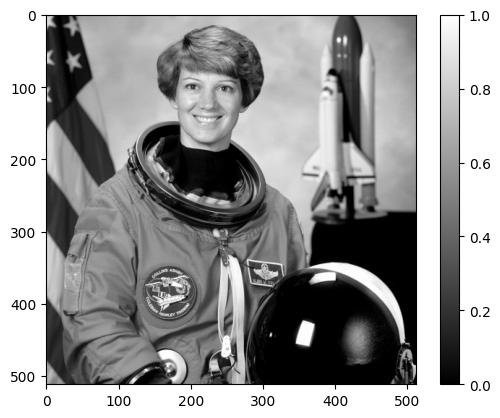

In [3]:
astr = plt.imread("data/astronaut.png")
plt.figure()
plt.imshow(astr, "gray")
plt.colorbar()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [4]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2 # Nachbarschaftsradius
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0

        for q in numpy.ndindex(size, size):
            y = q[0]+p[0]-n
            x = q[1]+p[1]-n

            if y < img_in.shape[0] and y>=0 and x>=0 and x< img_in.shape[1]:
                neighborhood_sum += img_in[y,x]
            else:
                neighborhood_sum = 0 
                break

        result[p] = neighborhood_sum/(size**2)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

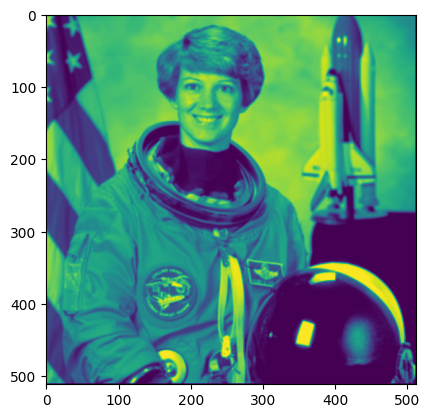

In [5]:

plt.imshow(meanfilter(astr, 3))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [6]:
img1= meanfilter(astr, 5)
img2= plt.imread("data/astronaut_meanfilter5.png")

assert numpy.allclose(img1, img2, atol=1/255)
# atol=1/255 spezifiziert die Toleranz für die maximale Abweichung pro Pixel

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [7]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2

    for p in numpy.ndindex(img_in.shape):
        neighborhood_list = []

        for q in numpy.ndindex(size, size):
            y = q[0] + p[0] - n
            x = q[1] + p[1] - n

            if 0 <= y < img_in.shape[0] and 0 <= x < img_in.shape[1]:
                neighborhood_list.append(img_in[y, x]) # neues Element meiner Liste hinzufügen
            else:
                neighborhood_list = [] 
                break
        if len(neighborhood_list)>0:
            # result[p] = numpy.median(neighborhood_list)
            neighborhood_list.sort() # Liste sortiern
            m = len(neighborhood_list)
            mid = m//2

            if m % 2 == 1:
                result[p] = neighborhood_list[mid] # ungerade Anzahl 
            else:                             #  gerade Anzahl
                result[p] = (neighborhood_list[mid - 1] +
                              neighborhood_list[mid]) / 2

    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

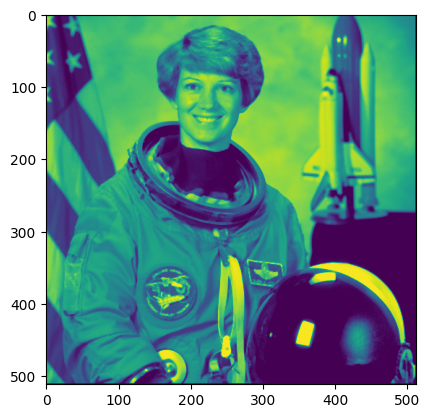

In [8]:
plt.imshow(medianfilter(astr, 3))

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [9]:
img3 = medianfilter(astr, 5)
img4= plt.imread("data/astronaut_medianfilter5.png")

assert numpy.allclose(img3, img4, atol=1/255)
# atol=1/255 spezifiziert die Toleranz für die maximale Abweichung pro Pixel

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [10]:
import scipy.ndimage
ast = astr

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

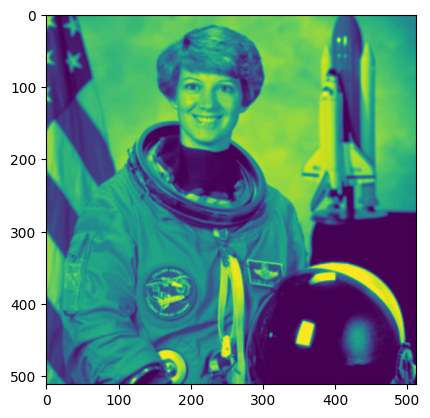

In [11]:
plt.imshow(scipy.ndimage.uniform_filter(ast, 3))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

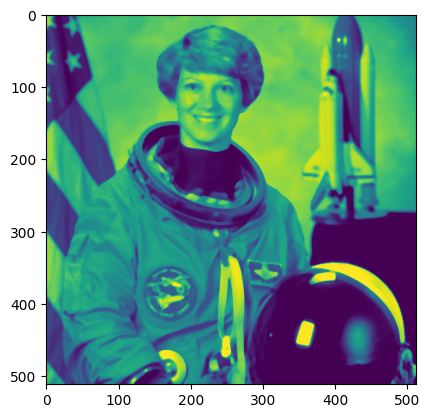

In [12]:
plt.imshow(scipy.ndimage.median_filter(ast, 5))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

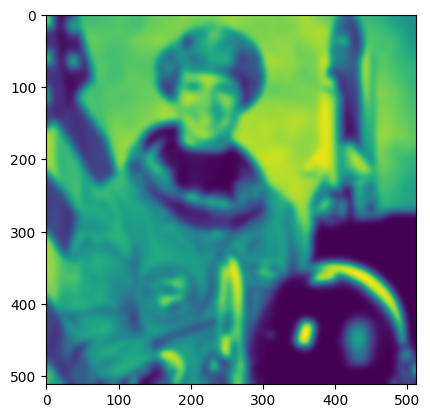

In [13]:
plt.imshow(scipy.ndimage.gaussian_filter(ast, 5))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Der Gaußfilter macht das Bild deutlich unschärfer als die anderen Filter.

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2  # Nachbarschaftsradius

    h, w = img_in.shape

    for y, x in numpy.ndindex(img_in.shape):

        # Randbehandlung 
        if y < n or y >= h - n or x < n or x >= w - n:
            result[y, x] = 0
        else:
            # Nachbarschaft als Slice
            neighborhood = img_in[y-n:y+n+1, x-n:x+n+1]

            # Mittelwert direkt berechnen
            result[y, x] = neighborhood.mean()

    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

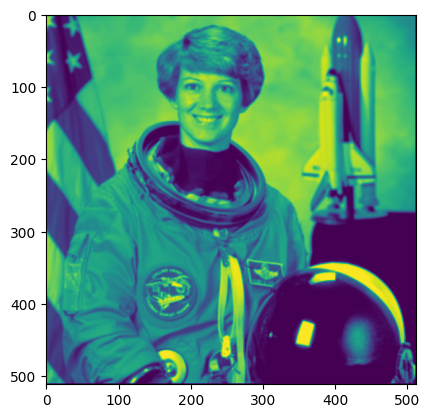

In [18]:
plt.imshow(fastfilter(astr, 3))

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [19]:
fast = fastfilter(astr, 3)
slow = meanfilter(astr, 3)

assert numpy.allclose(slow, fast, atol=1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [ ]:
%timeit fastfilter(astr, 5)
# 2.16 s ± 60.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

2.16 s ± 60.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit meanfilter(astr, 5)
# 10.7 s ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

10.7 s ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

fastfilter ist spürbar schneller, obwohl der Code viel einfacher ist